In [1]:
# All imports required 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,cross_val_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import pickle as pkl

## Exploratory Data Analysis

In [2]:
df=pd.read_csv(r"C:\Users\dkdes\OneDrive\Desktop\kaggle_datasets\customer_purchase_data.csv")
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


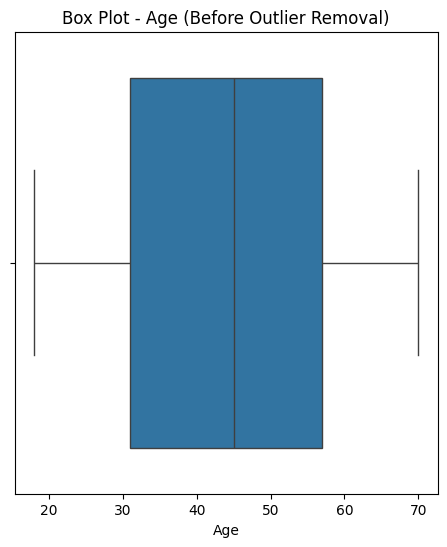

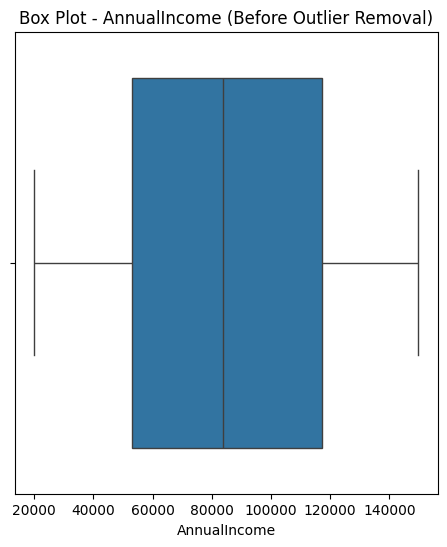

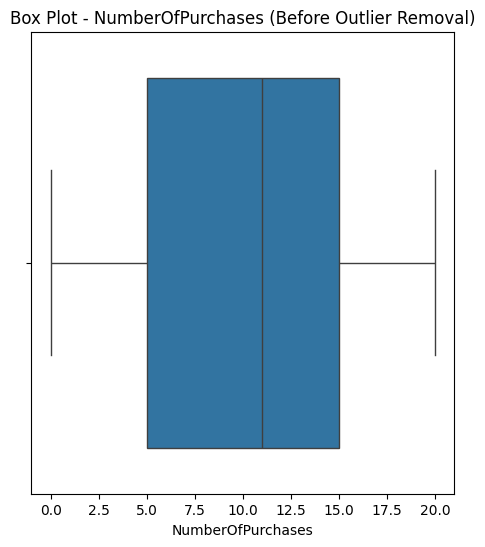

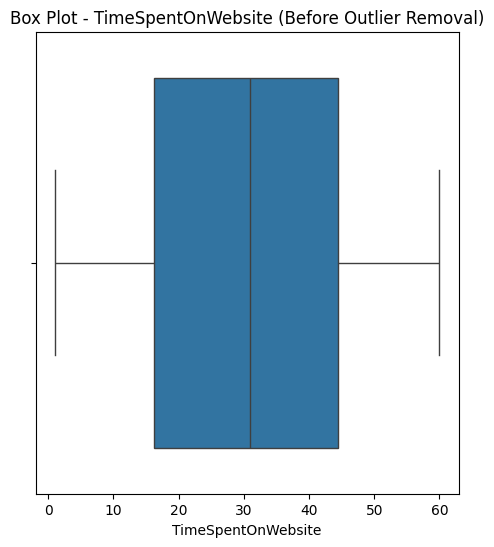

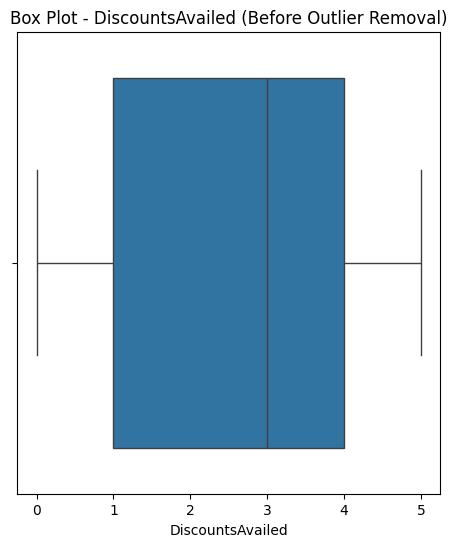

In [4]:
columns_to_check = df.drop(['Gender','ProductCategory','LoyaltyProgram','PurchaseStatus'],axis=1)
for col in columns_to_check:
    plt.figure(figsize=(12, 6))
    
    # Box plot before outlier removal
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot - {col} (Before Outlier Removal)')
plt.show()

<Figure size 800x500 with 0 Axes>

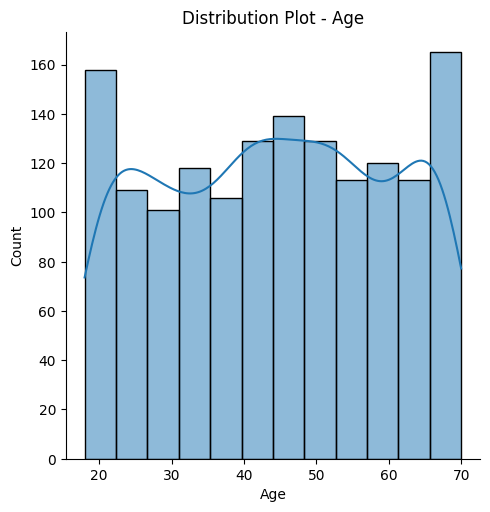

<Figure size 800x500 with 0 Axes>

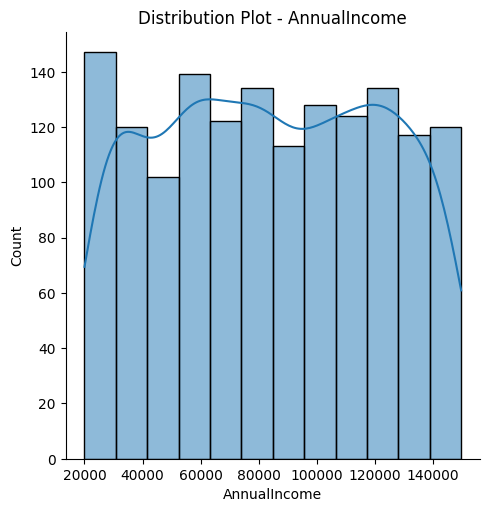

<Figure size 800x500 with 0 Axes>

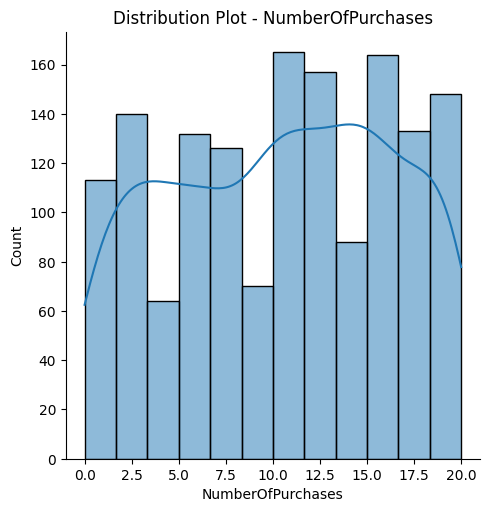

<Figure size 800x500 with 0 Axes>

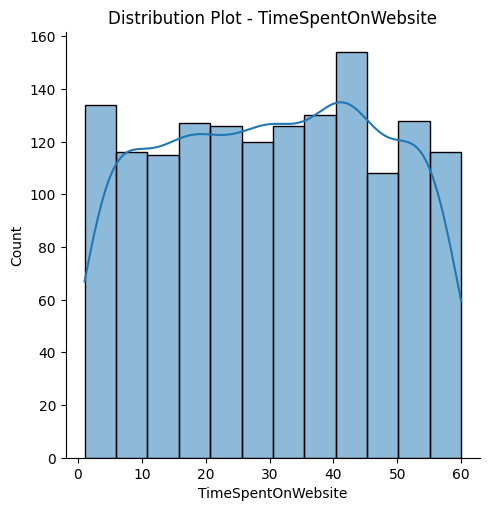

<Figure size 800x500 with 0 Axes>

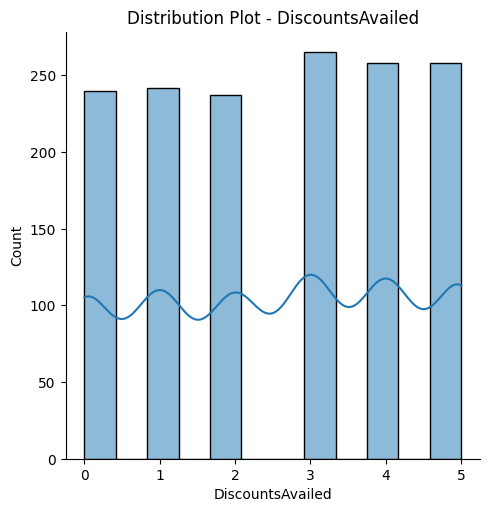

In [5]:
for col in columns_to_check:
    plt.figure(figsize=(8, 5))
    sns.displot(df[col], kde=True)
    plt.title(f'Distribution Plot - {col}')
    plt.show()

In [6]:
df[df.duplicated()]

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
243,57,1,79069.053493,8,4,43.221622,0,2,0
271,43,0,101042.774561,14,4,1.596751,0,5,0
299,65,1,55499.205296,20,4,12.778100,0,5,0
304,50,0,41425.926045,6,0,29.865093,1,2,0
306,56,1,48679.553852,17,1,10.110530,0,3,0
...,...,...,...,...,...,...,...,...,...
1461,67,1,110466.885362,17,0,43.108669,0,1,0
1484,68,0,80311.223269,14,2,19.080098,0,3,0
1485,21,1,120794.999552,10,0,7.630770,0,2,0
1492,63,0,71874.591294,10,2,43.546243,0,1,0


In [7]:
duplicate_rows_including_first = df[df.duplicated(keep=False)]

# Display all occurrences of duplicated rows
print(duplicate_rows_including_first)


      Age  Gender   AnnualIncome  NumberOfPurchases  ProductCategory  \
7      64       1   39707.359724                 13                2   
13     64       1   31880.893223                 17                0   
22     46       1  133256.582694                  7                2   
38     66       0  124009.225931                  7                4   
45     61       1  114517.379010                 12                1   
...   ...     ...            ...                ...              ...   
1467   68       0   80311.223269                 14                2   
1484   68       0   80311.223269                 14                2   
1485   21       1  120794.999552                 10                0   
1492   63       0   71874.591294                 10                2   
1493   34       1   20418.374269                  9                1   

      TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  PurchaseStatus  
7              17.190292               1                 0

In [8]:
df[df.duplicated(keep=False)]

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
7,64,1,39707.359724,13,2,17.190292,1,0,0
13,64,1,31880.893223,17,0,22.753473,1,1,0
22,46,1,133256.582694,7,2,41.685401,0,2,0
38,66,0,124009.225931,7,4,52.244617,0,0,0
45,61,1,114517.379010,12,1,30.981960,0,0,0
...,...,...,...,...,...,...,...,...,...
1467,68,0,80311.223269,14,2,19.080098,0,3,0
1484,68,0,80311.223269,14,2,19.080098,0,3,0
1485,21,1,120794.999552,10,0,7.630770,0,2,0
1492,63,0,71874.591294,10,2,43.546243,0,1,0


In [9]:
df.shape

(1500, 9)

In [10]:
df=df.drop_duplicates()

In [11]:
df.shape

(1388, 9)

In [12]:
X=df.drop("PurchaseStatus",axis=1)
y=df["PurchaseStatus"]

## Training ,Testing and scaling

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [14]:
scaler=ColumnTransformer(transformers=[('tnf1',StandardScaler(),['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory',
                                     'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed']),
                                            ],
                                            remainder='passthrough')

In [15]:
X_train_trf = scaler.fit_transform(X_train)
X_test_trf=scaler.transform(X_test)

In [16]:
df.shape

(1388, 9)

## Building ANN model

In [17]:
model=Sequential()
model.add(Dense(32,activation='relu',input_dim=8))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 32)                0

In [19]:
model.compile(optimizer="adam",metrics=["accuracy"],loss="binary_crossentropy")

In [20]:
callbacks=EarlyStopping(monitor="val_loss",patience=5)

In [21]:
history=model.fit(X_train_trf,y_train,validation_split=0.2,epochs=100,batch_size=52,callbacks=callbacks)

Epoch 1/100
18/18 [==============================] - 5s 41ms/step - loss: 0.9344 - accuracy: 0.5045 - val_loss: 0.6673 - val_accuracy: 0.6261
Epoch 2/100
18/18 [==============================] - 0s 11ms/step - loss: 0.8182 - accuracy: 0.5495 - val_loss: 0.6570 - val_accuracy: 0.6847
Epoch 3/100
18/18 [==============================] - 0s 9ms/step - loss: 0.8239 - accuracy: 0.5394 - val_loss: 0.6475 - val_accuracy: 0.7117
Epoch 4/100
18/18 [==============================] - 0s 8ms/step - loss: 0.7840 - accuracy: 0.5541 - val_loss: 0.6402 - val_accuracy: 0.7523
Epoch 5/100
18/18 [==============================] - 0s 8ms/step - loss: 0.7553 - accuracy: 0.5698 - val_loss: 0.6305 - val_accuracy: 0.7342
Epoch 6/100
18/18 [==============================] - 0s 9ms/step - loss: 0.7492 - accuracy: 0.5788 - val_loss: 0.6242 - val_accuracy: 0.7387
Epoch 7/100
18/18 [==============================] - 0s 9ms/step - loss: 0.7209 - accuracy: 0.5800 - val_loss: 0.6143 - val_accuracy: 0.7297
Epoch 8/100

## Using Keras Tuner for best Hyperparameters

In [22]:
import keras_tuner as kt
import os
import shutil
tuner_dir = 'my_dir'
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

def build_model(hp):
    model = Sequential()
    num_layers = hp.Int("num_layers", min_value=1, max_value=10)
    
    for i in range(num_layers):
        if i == 0:
            model.add(Dense(
                units=hp.Int(f"units_{i}", min_value=16, max_value=128, step=8),
                activation=hp.Choice(f"activation_{i}", values=["relu", "tanh", "sigmoid"]),
                input_dim=8 
            ))
        else:
            model.add(Dense(
                units=hp.Int(f"units_{i}", min_value=16, max_value=128, step=8),
                activation=hp.Choice(f"activation_{i}", values=["relu", "tanh", "sigmoid"])
            ))
        model.add(BatchNormalization())
        model.add(Dropout(rate=hp.Float(f"dropout_{i}", min_value=0.0, max_value=0.9, step=0.1)))
    
    model.add(Dense(1, activation='sigmoid'))  
    model.compile(
        optimizer=hp.Choice("optimizer", values=["adam", "rmsprop", "sgd", "nadam", "adadelta"]),
        loss="binary_crossentropy",  
        metrics=["accuracy"]
    )
    return model


In [23]:
tuner = kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=3,
    directory=tuner_dir,
    project_name='my_project'
)

In [24]:
tuner.search(X_train_trf,y_train,epochs=5,validation_data=(X_test_trf,y_test))

Trial 3 Complete [00h 00m 15s]
val_accuracy: 0.5467625856399536

Best val_accuracy So Far: 0.6187050342559814
Total elapsed time: 00h 00m 34s


In [25]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 10,
 'units_0': 32,
 'activation_0': 'tanh',
 'dropout_0': 0.30000000000000004,
 'optimizer': 'adam',
 'units_1': 16,
 'activation_1': 'relu',
 'dropout_1': 0.0,
 'units_2': 16,
 'activation_2': 'relu',
 'dropout_2': 0.0,
 'units_3': 16,
 'activation_3': 'relu',
 'dropout_3': 0.0,
 'units_4': 16,
 'activation_4': 'relu',
 'dropout_4': 0.0,
 'units_5': 16,
 'activation_5': 'relu',
 'dropout_5': 0.0,
 'units_6': 16,
 'activation_6': 'relu',
 'dropout_6': 0.0,
 'units_7': 16,
 'activation_7': 'relu',
 'dropout_7': 0.0,
 'units_8': 16,
 'activation_8': 'relu',
 'dropout_8': 0.0,
 'units_9': 16,
 'activation_9': 'relu',
 'dropout_9': 0.0}

In [26]:
model=tuner.get_best_models(num_models=1)[0]

In [27]:
model.fit(X_train_trf,y_train,epochs=100,validation_split=0.2,callbacks=callbacks)

Epoch 1/100
28/28 [==============================] - 11s 37ms/step - loss: 0.6498 - accuracy: 0.6385 - val_loss: 0.6629 - val_accuracy: 0.6126
Epoch 2/100
28/28 [==============================] - 0s 12ms/step - loss: 0.6351 - accuracy: 0.6216 - val_loss: 0.6443 - val_accuracy: 0.6892
Epoch 3/100
28/28 [==============================] - 0s 11ms/step - loss: 0.6318 - accuracy: 0.6374 - val_loss: 0.6295 - val_accuracy: 0.6892
Epoch 4/100
28/28 [==============================] - 0s 11ms/step - loss: 0.6177 - accuracy: 0.6678 - val_loss: 0.6150 - val_accuracy: 0.6982
Epoch 5/100
28/28 [==============================] - 0s 12ms/step - loss: 0.6108 - accuracy: 0.6689 - val_loss: 0.5814 - val_accuracy: 0.7117
Epoch 6/100
28/28 [==============================] - 0s 10ms/step - loss: 0.6051 - accuracy: 0.6712 - val_loss: 0.5588 - val_accuracy: 0.7072
Epoch 7/100
28/28 [==============================] - 0s 7ms/step - loss: 0.5914 - accuracy: 0.6836 - val_loss: 0.5560 - val_accuracy: 0.7297
Epoch 

## Training ML algorithms 

In [28]:
lr=LogisticRegression(penalty=None)
lr.fit(X_train_trf,y_train)
y_pred=lr.predict(X_test_trf)
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

print(f"accuracy:{accuracy}")
print(f"precison:{precision}")
print(f"recall:{recall}")
print(f"f1:{f1}")
print("Test accuracy:",np.mean(cross_val_score(lr,X_test_trf,y_test,scoring="accuracy",cv=5)))
print("Training accuracy:",np.mean(cross_val_score(lr,X_train_trf,y_train,scoring="accuracy",cv=5)))

accuracy:0.802158273381295
precison:0.7886178861788617
recall:0.7698412698412699
f1:0.7791164658634538
Test accuracy: 0.802077922077922
Training accuracy: 0.8171171171171171


In [29]:
rf=RandomForestClassifier(n_estimators=300)
rf.fit(X_train_trf,y_train)
y_pred=rf.predict(X_test_trf)
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

print(f"accuracy:{accuracy}")
print(f"precison:{precision}")
print(f"recall:{recall}")
print(f"f1:{f1}")
print("Test accuracy:",np.mean(cross_val_score(rf,X_test_trf,y_test,scoring="accuracy",cv=5)))
print("Training accuracy:",np.mean(cross_val_score(rf,X_train_trf,y_train,scoring="accuracy",cv=5)))

accuracy:0.9316546762589928
precison:0.9421487603305785
recall:0.9047619047619048
f1:0.9230769230769231
Test accuracy: 0.8449350649350649
Training accuracy: 0.9243243243243244


In [30]:
svm=SVC(C=0.5,kernel="rbf")
svm.fit(X_train_trf,y_train)
y_pred=svm.predict(X_test_trf)
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

print(f"accuracy:{accuracy}")
print(f"precison:{precision}")
print(f"recall:{recall}")
print(f"f1:{f1}")
print("Test accuracy:",np.mean(cross_val_score(svm,X_test_trf,y_test,scoring="accuracy",cv=5)))
print("Training accuracy:",np.mean(cross_val_score(svm,X_train_trf,y_train,scoring="accuracy",cv=5)))

accuracy:0.8453237410071942
precison:0.8487394957983193
recall:0.8015873015873016
f1:0.8244897959183674
Test accuracy: 0.8020779220779222
Training accuracy: 0.8432432432432433


In [31]:
# Creating Pipeline for app deployment on streamlit
pipeline = Pipeline([
    ('scaler', scaler),
    ('classifier', rf)
])

In [32]:
with open("Customer_Purchase_model2.pkl","wb") as file:
    pkl.dump(pipeline,file)